In [15]:
import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import arff
from python_scripts import csv_processing as dp
#import dtreeviz as dt
import warnings
warnings.filterwarnings("ignore")

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, \
        confusion_matrix, classification_report, precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.utils.class_weight import compute_class_weight
from sklearn.feature_selection import SelectKBest, f_classif

In [21]:
df = pd.read_csv("../data/3year.csv")
X_train, X_test, y_train, y_test = dp.pre_process(df)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(13978, 30) (3151, 30)
(13978, 1) (3151, 1)


In [3]:
rdt = RandomForestClassifier(n_estimators=100, max_depth=5)

rdt.fit(X_train, y_train)
y_pred = rdt.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall Score:", recall)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.7185020628371945
F1 Score: 0.17488372093023258
Recall Score: 0.7014925373134329
Confusion Matrix:
 [[2170  847]
 [  40   94]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.72      0.83      3017
           1       0.10      0.70      0.17       134

    accuracy                           0.72      3151
   macro avg       0.54      0.71      0.50      3151
weighted avg       0.94      0.72      0.80      3151



In [4]:
rdt = RandomForestClassifier(n_estimators=100, max_depth=5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scoring = ['accuracy', 'f1', 'recall', 'precision', 'roc_auc']
#scores = cross_val_score(rdt, X_train, y_train, cv=kf, scoring=scoring)

print("Cross Validation Scores:")
for metric in scoring:
    scores = cross_val_score(rdt, X_train, y_train, cv=kf, scoring=metric)
    print(f"{metric}: {np.mean(scores)}")


Cross Validation Scores:
accuracy: 0.7769364617483191
f1: 0.792453319983754
recall: 0.8539817406125033
precision: 0.7414391836143049
roc_auc: 0.8550028223631779


In [5]:
# Define the model
rdt = RandomForestClassifier()

# Define the hyperparameters and their values for grid search
param_grid = {
    'n_estimators': [100, 200, 300],  # Example values
    'max_depth': [5, 10, 15, None],   # Added None to consider unlimited depth
    'min_samples_split': [2, 5, 10],  # Example values
    'min_samples_leaf': [1, 2, 4],    # Example values
    'max_features': ['auto', 'sqrt']  # Example values
}

# Initialize the GridSearchCV object with 'f1' scoring
grid_search = GridSearchCV(estimator=rdt, param_grid=param_grid, cv=5, scoring='f1', verbose=2, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best F1 score
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

# Use the best estimator to make predictions
y_pred = grid_search.predict(X_test)

# Evaluate the model with the selected metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall Score:", recall)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


KeyboardInterrupt: 

In [ ]:
# Define the model
rdt = RandomForestClassifier()

# Define the hyperparameters and their values for grid search
param_grid = {
    'n_estimators': [200],  # Example values
    'max_depth': [5, 10, 15,20,40],   # Added None to consider unlimited depth
    'min_samples_split': [2],  # Example values
    'min_samples_leaf': [1],    # Example values
    'max_features': ['sqrt']  # Example values
}

# Initialize the GridSearchCV object with 'f1' scoring
grid_search = GridSearchCV(estimator=rdt, param_grid=param_grid, cv=5, scoring='f1', verbose=2, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best F1 score
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

# Use the best estimator to make predictions
y_pred = grid_search.predict(X_test)

# Evaluate the model with the selected metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall Score:", recall)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Parameters: {'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best F1 Score: 0.9634809154505923
Accuracy: 0.9235163440177722
F1 Score: 0.17747440273037543
Recall Score: 0.19402985074626866
Confusion Matrix:
 [[2884  133]
 [ 108   26]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      3017
           1       0.16      0.19      0.18       134

    accuracy                           0.92      3151
   macro avg       0.56      0.57      0.57      3151
weighted avg       0.93      0.92      0.93      3151



In [ ]:
# Define the model
rdt = RandomForestClassifier()

# Define the hyperparameters and their values for grid search
param_grid = {
    'n_estimators': [200],  # Example values
    'max_depth': [None],   # Added None to consider unlimited depth
    'min_samples_split': [2],  # Example values
    'min_samples_leaf': [1],    # Example values
    'max_features': ['sqrt']  # Example values
}

# Initialize the GridSearchCV object with 'f1' scoring
grid_search = GridSearchCV(estimator=rdt, param_grid=param_grid, cv=5, scoring='f1_macro', verbose=2, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best F1 score
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

# Use the best estimator to make predictions
y_pred = grid_search.predict(X_test)

# Evaluate the model with the selected metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall Score:", recall)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best F1 Score: 0.9622852782619022
Accuracy: 0.9247857822913361
F1 Score: 0.20202020202020202
Recall Score: 0.22388059701492538
Confusion Matrix:
 [[2884  133]
 [ 104   30]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96      3017
           1       0.18      0.22      0.20       134

    accuracy                           0.92      3151
   macro avg       0.57      0.59      0.58      3151
weighted avg       0.93      0.92      0.93      3151



In [ ]:
# Assuming X_train, y_train, X_test, y_test are predefined

# Start with no features for forward selection, or all features for backward elimination
selected_features = []  # For forward selection
# selected_features = list(X_train.columns)  # For backward elimination

best_f1 = 0  # Keep track of the best performance
features = list(X_train.columns)

# Forward Selection
for _ in range(len(features)):
    f1_scores = []
    for feature in features:
        if feature not in selected_features:
            # Add the feature temporarily
            temp_features = selected_features + [feature]
            # Train model and predict
            rdt = RandomForestClassifier(n_estimators=200, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 2)
            rdt.fit(X_train[temp_features], y_train)
            y_pred = rdt.predict(X_test[temp_features])
            # Evaluate and store F1 score
            f1 = f1_score(y_test, y_pred)
            f1_scores.append((feature, f1))
    
    # Find the best feature of this round
    f1_scores.sort(key=lambda x: x[1], reverse=True)
    best_feature, best_feature_f1 = f1_scores[0]

    # If performance improved, update the model
    if best_feature_f1 > best_f1:
        print(f"Adding {best_feature} improved F1 to {best_feature_f1}")
        best_f1 = best_feature_f1
        selected_features.append(best_feature)
    else:
        break  # Stop if no improvement

# Your final set of features
print("Selected features:", selected_features)


Adding Attr26 improved F1 to 0.12019491066594477
Adding Attr24 improved F1 to 0.14890016920473773
Adding Attr27 improved F1 to 0.17311608961303465
Adding Attr5 improved F1 to 0.19923371647509577
Adding Attr36 improved F1 to 0.21646341463414634
Adding Attr9 improved F1 to 0.25089605734767023
Adding Attr58 improved F1 to 0.2874493927125506
Selected features: ['Attr26', 'Attr24', 'Attr27', 'Attr5', 'Attr36', 'Attr9', 'Attr58']


In [ ]:
selected_features = ['Attr26', 'Attr24', 'Attr27', 'Attr5', 'Attr36', 'Attr9', 'Attr58']

# Subset the training and testing data to include only the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Initialize a new Random Forest classifier
rdt_selected = RandomForestClassifier(n_estimators=200, max_features='sqrt', min_samples_leaf=1, min_samples_split=2)

# Train the classifier on the subsetted training data
rdt_selected.fit(X_train_selected, y_train)

# Predict on the subsetted test data
y_pred_selected = rdt_selected.predict(X_test_selected)

# Evaluate the model's performance (optional)
accuracy_selected = accuracy_score(y_test, y_pred_selected)
f1_selected = f1_score(y_test, y_pred_selected)
recall_selected = recall_score(y_test, y_pred_selected)
conf_matrix_selected = confusion_matrix(y_test, y_pred_selected)
class_report_selected = classification_report(y_test, y_pred_selected)

# Print the evaluation metrics
print(f"Accuracy with selected features: {accuracy_selected}")
print(f"F1 Score with selected features: {f1_selected}")
print(f"Recall Score with selected features: {recall_selected}")
print(f"Confusion Matrix with selected features:\n{conf_matrix_selected}")
print(f"Classification Report with selected features:\n{class_report_selected}")

Accuracy with selected features: 0.8870199936528086
F1 Score with selected features: 0.288
Recall Score with selected features: 0.5373134328358209
Confusion Matrix with selected features:
[[2723  294]
 [  62   72]]
Classification Report with selected features:
              precision    recall  f1-score   support

           0       0.98      0.90      0.94      3017
           1       0.20      0.54      0.29       134

    accuracy                           0.89      3151
   macro avg       0.59      0.72      0.61      3151
weighted avg       0.94      0.89      0.91      3151



In [ ]:

selected_features = ['Attr26', 'Attr24', 'Attr27', 'Attr5', 'Attr36', 'Attr9', 'Attr58']

# Remaining features to test for forward selection
remaining_features = [feat for feat in X_train.columns if feat not in selected_features]

# Best F1 score to start with (from the previous model)
best_f1 = f1_selected  # Use the F1 score from your previous results

# Iteratively add one feature at a time from the remaining features
for feature in remaining_features:
    # Add the new feature to the selected features
    features_to_test = selected_features + [feature]
    
    # Train the model with the current set of selected features plus the new feature
    rdt_test = RandomForestClassifier(n_estimators=200, max_features='sqrt', min_samples_leaf=1, min_samples_split=2)
    rdt_test.fit(X_train[features_to_test], y_train)
    
    # Predict on the test set with the current set of features
    y_pred_test = rdt_test.predict(X_test[features_to_test])
    
    # Calculate the F1 score with the current set of features
    f1_test = f1_score(y_test, y_pred_test)
    
    # Check if the F1 score improved with the addition of the new feature
    if f1_test > best_f1:
        print(f"Adding {feature} improved F1 to {f1_test}")
        # Update the list of selected features and the best F1 score
        selected_features.append(feature)
        best_f1 = f1_test
    else:
        print(f"Adding {feature} did not improve F1")

# Final set of selected features after forward selection
print(f"Final selected features: {selected_features}")


Adding Attr13 did not improve F1
Adding Attr15 did not improve F1
Adding Attr21 did not improve F1
Adding Attr29 did not improve F1
Adding Attr32 did not improve F1
Adding Attr33 did not improve F1
Adding Attr41 did not improve F1
Adding Attr44 did not improve F1
Adding Attr45 improved F1 to 0.29004329004329005
Adding Attr48 did not improve F1
Adding Attr49 did not improve F1
Adding Attr50 did not improve F1
Adding Attr51 did not improve F1
Adding Attr52 did not improve F1
Adding Attr54 did not improve F1
Adding Attr55 did not improve F1
Adding Attr56 improved F1 to 0.2905982905982906
Adding Attr59 did not improve F1
Adding Attr60 did not improve F1
Adding Attr61 did not improve F1
Adding Attr62 did not improve F1
Adding Attr63 did not improve F1
Adding Attr64 did not improve F1
Final selected features: ['Attr26', 'Attr24', 'Attr27', 'Attr5', 'Attr36', 'Attr9', 'Attr58', 'Attr45', 'Attr56']


In [14]:
selected_features = ['Attr26', 'Attr24', 'Attr27', 'Attr5', 'Attr36', 'Attr9', 'Attr58', 'Attr45', 'Attr56']

# Subset the training and testing data to include only the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

class_weight = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {i: class_weight[i] for i in range(len(class_weight))}

# Initialize a new Random Forest classifier
rdt_selected = RandomForestClassifier(
    n_estimators=200,
    max_features='sqrt',
    min_samples_leaf=4,  # Increased from 1 to 4
    min_samples_split=10,  # Increased from 2 to 10
    max_depth=50,  
    class_weight=class_weight_dict
)

# Train the classifier on the subsetted training data
rdt_selected.fit(X_train_selected, y_train)

# Predict on the subsetted test data
y_pred_selected = rdt_selected.predict(X_test_selected)

# Evaluate the model's performance (optional)
accuracy_selected = accuracy_score(y_test, y_pred_selected)
f1_selected = f1_score(y_test, y_pred_selected)
recall_selected = recall_score(y_test, y_pred_selected)
conf_matrix_selected = confusion_matrix(y_test, y_pred_selected)
class_report_selected = classification_report(y_test, y_pred_selected)
train_accuraccy = rdt_selected.score(X_train_selected, y_train)

# Print the evaluation metrics
print(f"Train Accuracy with selected features: {train_accuraccy}")
print(f"Accuracy with selected features: {accuracy_selected}")
print(f"F1 Score with selected features: {f1_selected}")
print(f"Recall Score with selected features: {recall_selected}")
print(f"Confusion Matrix with selected features:\n{conf_matrix_selected}")
print(f"Classification Report with selected features:\n{class_report_selected}")

Train Accuracy with selected features: 0.979396194019173
Accuracy with selected features: 0.8682957791177404
F1 Score with selected features: 0.26287744227353466
Recall Score with selected features: 0.5522388059701493
Confusion Matrix with selected features:
[[2662  355]
 [  60   74]]
Classification Report with selected features:
              precision    recall  f1-score   support

           0       0.98      0.88      0.93      3017
           1       0.17      0.55      0.26       134

    accuracy                           0.87      3151
   macro avg       0.58      0.72      0.60      3151
weighted avg       0.94      0.87      0.90      3151



In [27]:
def find_best_k_features_for_f1(model, X_train, y_train, X_test, y_test):
    original_n_features = X_train.shape[1]

    train_f1_dict = {}
    test_f1_dict = {}

    for k in range(1, original_n_features + 1):
        X_train_selected, X_test_selected, y_train_selected, y_test_selected = get_df_with_top_k_features(k, X_train, X_test, y_train, y_test)
        model.fit(X_train_selected, y_train_selected)
        y_train_pred = model.predict(X_train_selected)
        y_test_pred = model.predict(X_test_selected)

        train_f1 = f1_score(y_train_selected, y_train_pred)
        test_f1 = f1_score(y_test_selected, y_test_pred)

        train_f1_dict[k] = train_f1
        test_f1_dict[k] = test_f1

    best_train_f1_k = max(train_f1_dict, key=train_f1_dict.get)
    best_test_f1_k = max(test_f1_dict, key=test_f1_dict.get)

    print(f"Best k for train F1 score: {best_train_f1_k}")
    print(f"Best k for test F1 score: {best_test_f1_k}")

    plot_ANOVA_f1_graph(train_f1_dict, test_f1_dict)


def plot_ANOVA_f1_graph(train_f1_dict, test_f1_dict):
    import matplotlib.pyplot as plt
    
    plt.figure(figsize=(10, 5))
    plt.plot(list(train_f1_dict.keys()), list(train_f1_dict.values()), label='Train F1 Score', color='blue')
    plt.plot(list(test_f1_dict.keys()), list(test_f1_dict.values()), label='Test F1 Score', color='red')
    plt.xlabel('Number of Features')
    plt.ylabel('F1 Score')
    plt.title('F1 Score vs. Number of Features')
    plt.legend()
    plt.grid(True)
    plt.show()

def get_df_with_top_k_features(k, X_train, X_test, y_train, y_test):
    # Initialize SelectKBest with the ANOVA F-test as the score function
    selector = SelectKBest(score_func=f_classif, k=k)

    # Fit the selector to the training data and transform the training and test data
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_test_selected = selector.transform(X_test)

    # Since SelectKBest returns NumPy arrays, convert them back to DataFrame if needed
    # Get the selected feature names
    features = selector.get_support(indices=True)
    feature_names = X_train.columns[features]

    X_train_selected = pd.DataFrame(X_train_selected, columns=feature_names)
    X_test_selected = pd.DataFrame(X_test_selected, columns=feature_names)

    return X_train_selected, X_test_selected, y_train, y_test


Best k for train F1 score: 25
Best k for test F1 score: 30


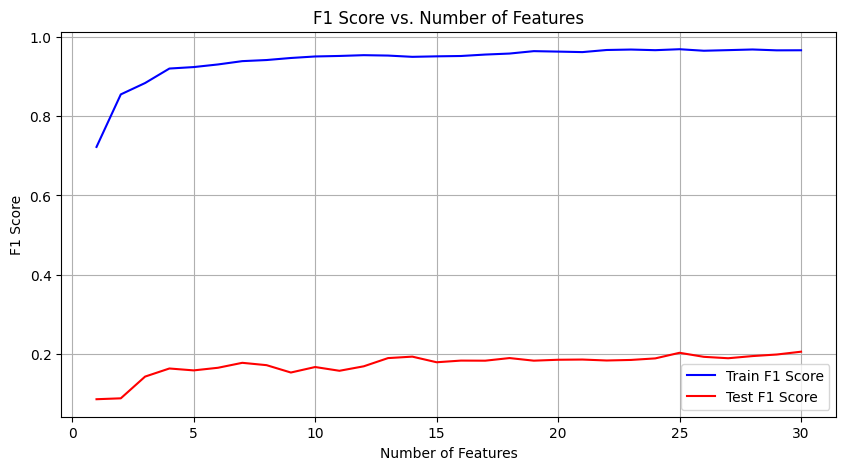

In [29]:
class_weight = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {i: class_weight[i] for i in range(len(class_weight))}

# Initialize a new Random Forest classifier
rdt = RandomForestClassifier(
    n_estimators=200,
    max_features='sqrt',
    min_samples_leaf=4,  # Increased from 1 to 4
    min_samples_split=10,  # Increased from 2 to 10
    max_depth=15,  
    class_weight=class_weight_dict
)

# Assuming all functions are in the same script or properly imported
find_best_k_features_for_f1(rdt, X_train, y_train, X_test, y_test)



In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=200,
    max_features='sqrt',
    max_depth=30,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42
)

In [32]:
train_sizes, train_scores, validation_scores = learning_curve(
    estimator = model,
    X = X_train,
    y = y_train,
    train_sizes = np.linspace(0.1, 1.0, 10),
    cv = 5,
    scoring = 'f1',
    n_jobs = -1
)

KeyboardInterrupt: 

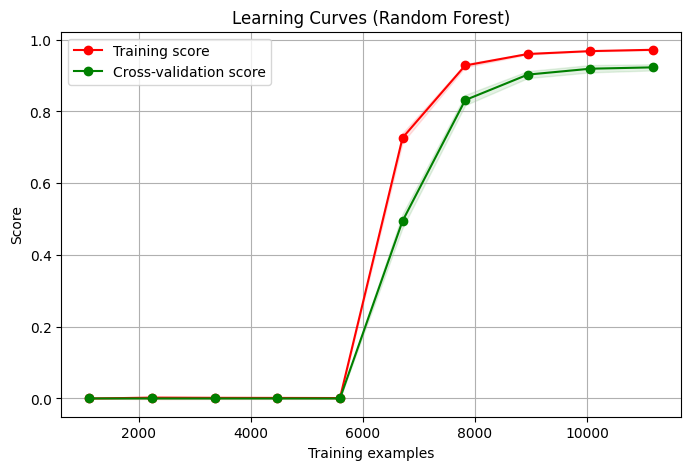

In [33]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)
validation_scores_std = np.std(validation_scores, axis=1)

plt.figure(figsize=(8, 5))
plt.title("Learning Curves (Random Forest)")
plt.xlabel("Training examples")
plt.ylabel("Score")

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                 validation_scores_mean + validation_scores_std, alpha=0.1,
                 color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, validation_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")
plt.grid()
plt.show()
